# Model Performance Analysis

In [1]:
from configparser import ConfigParser
import yaml
import os
import pandas as pd
import matplotlib.pyplot as plt

from current_research_feature_effects.plotting.plots import boxplot_model_results

In [2]:
os.chdir("../")
config = ConfigParser()
config.read("config.ini")

['config.ini']

In [3]:
model_results_storage = config.get("storage", "model_results")
experiment_name = config.get("storage", "simulation_name")
with open(config.get("simulation_params", "datasets_yaml"), "r") as file:
    datasets_config = yaml.safe_load(file)
datasets = list(datasets_config.keys())
df = pd.DataFrame()
dfs = []
for dataset in datasets:
    df_temp = pd.read_sql_table(
        "model_results", f"sqlite:///experiments/{experiment_name}/{dataset}{model_results_storage}"
    )
    df_temp["dataset"] = dataset
    dfs.append(df_temp)
    df = pd.concat([df, df_temp]).drop(columns=["index"])

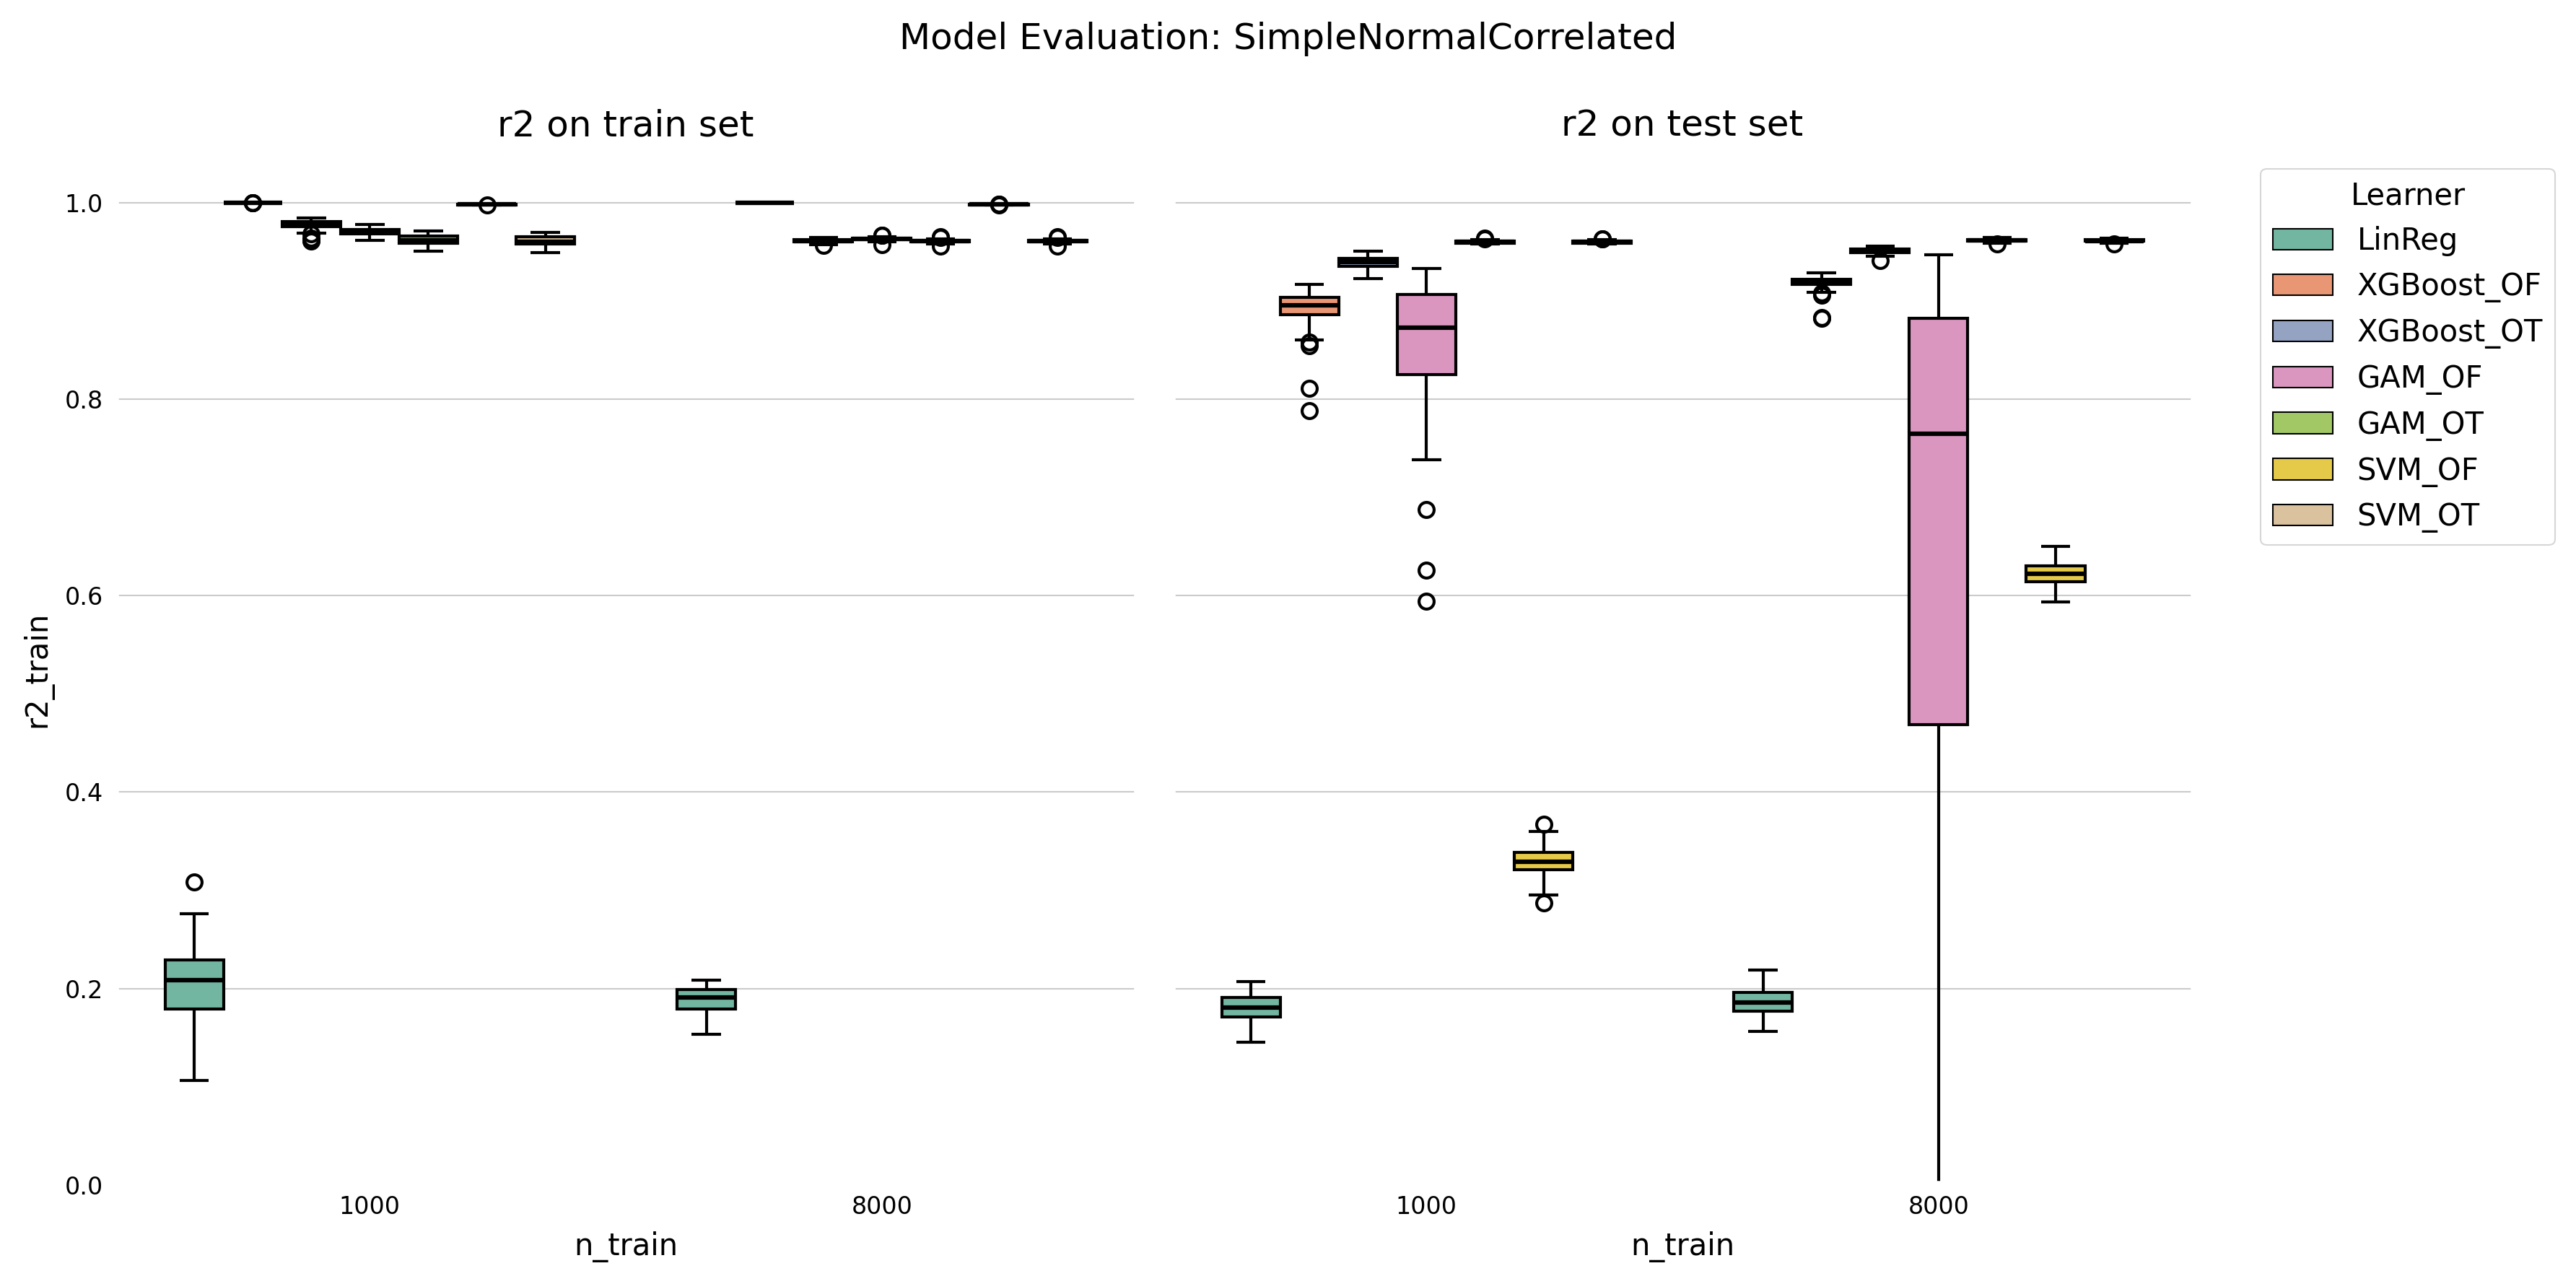

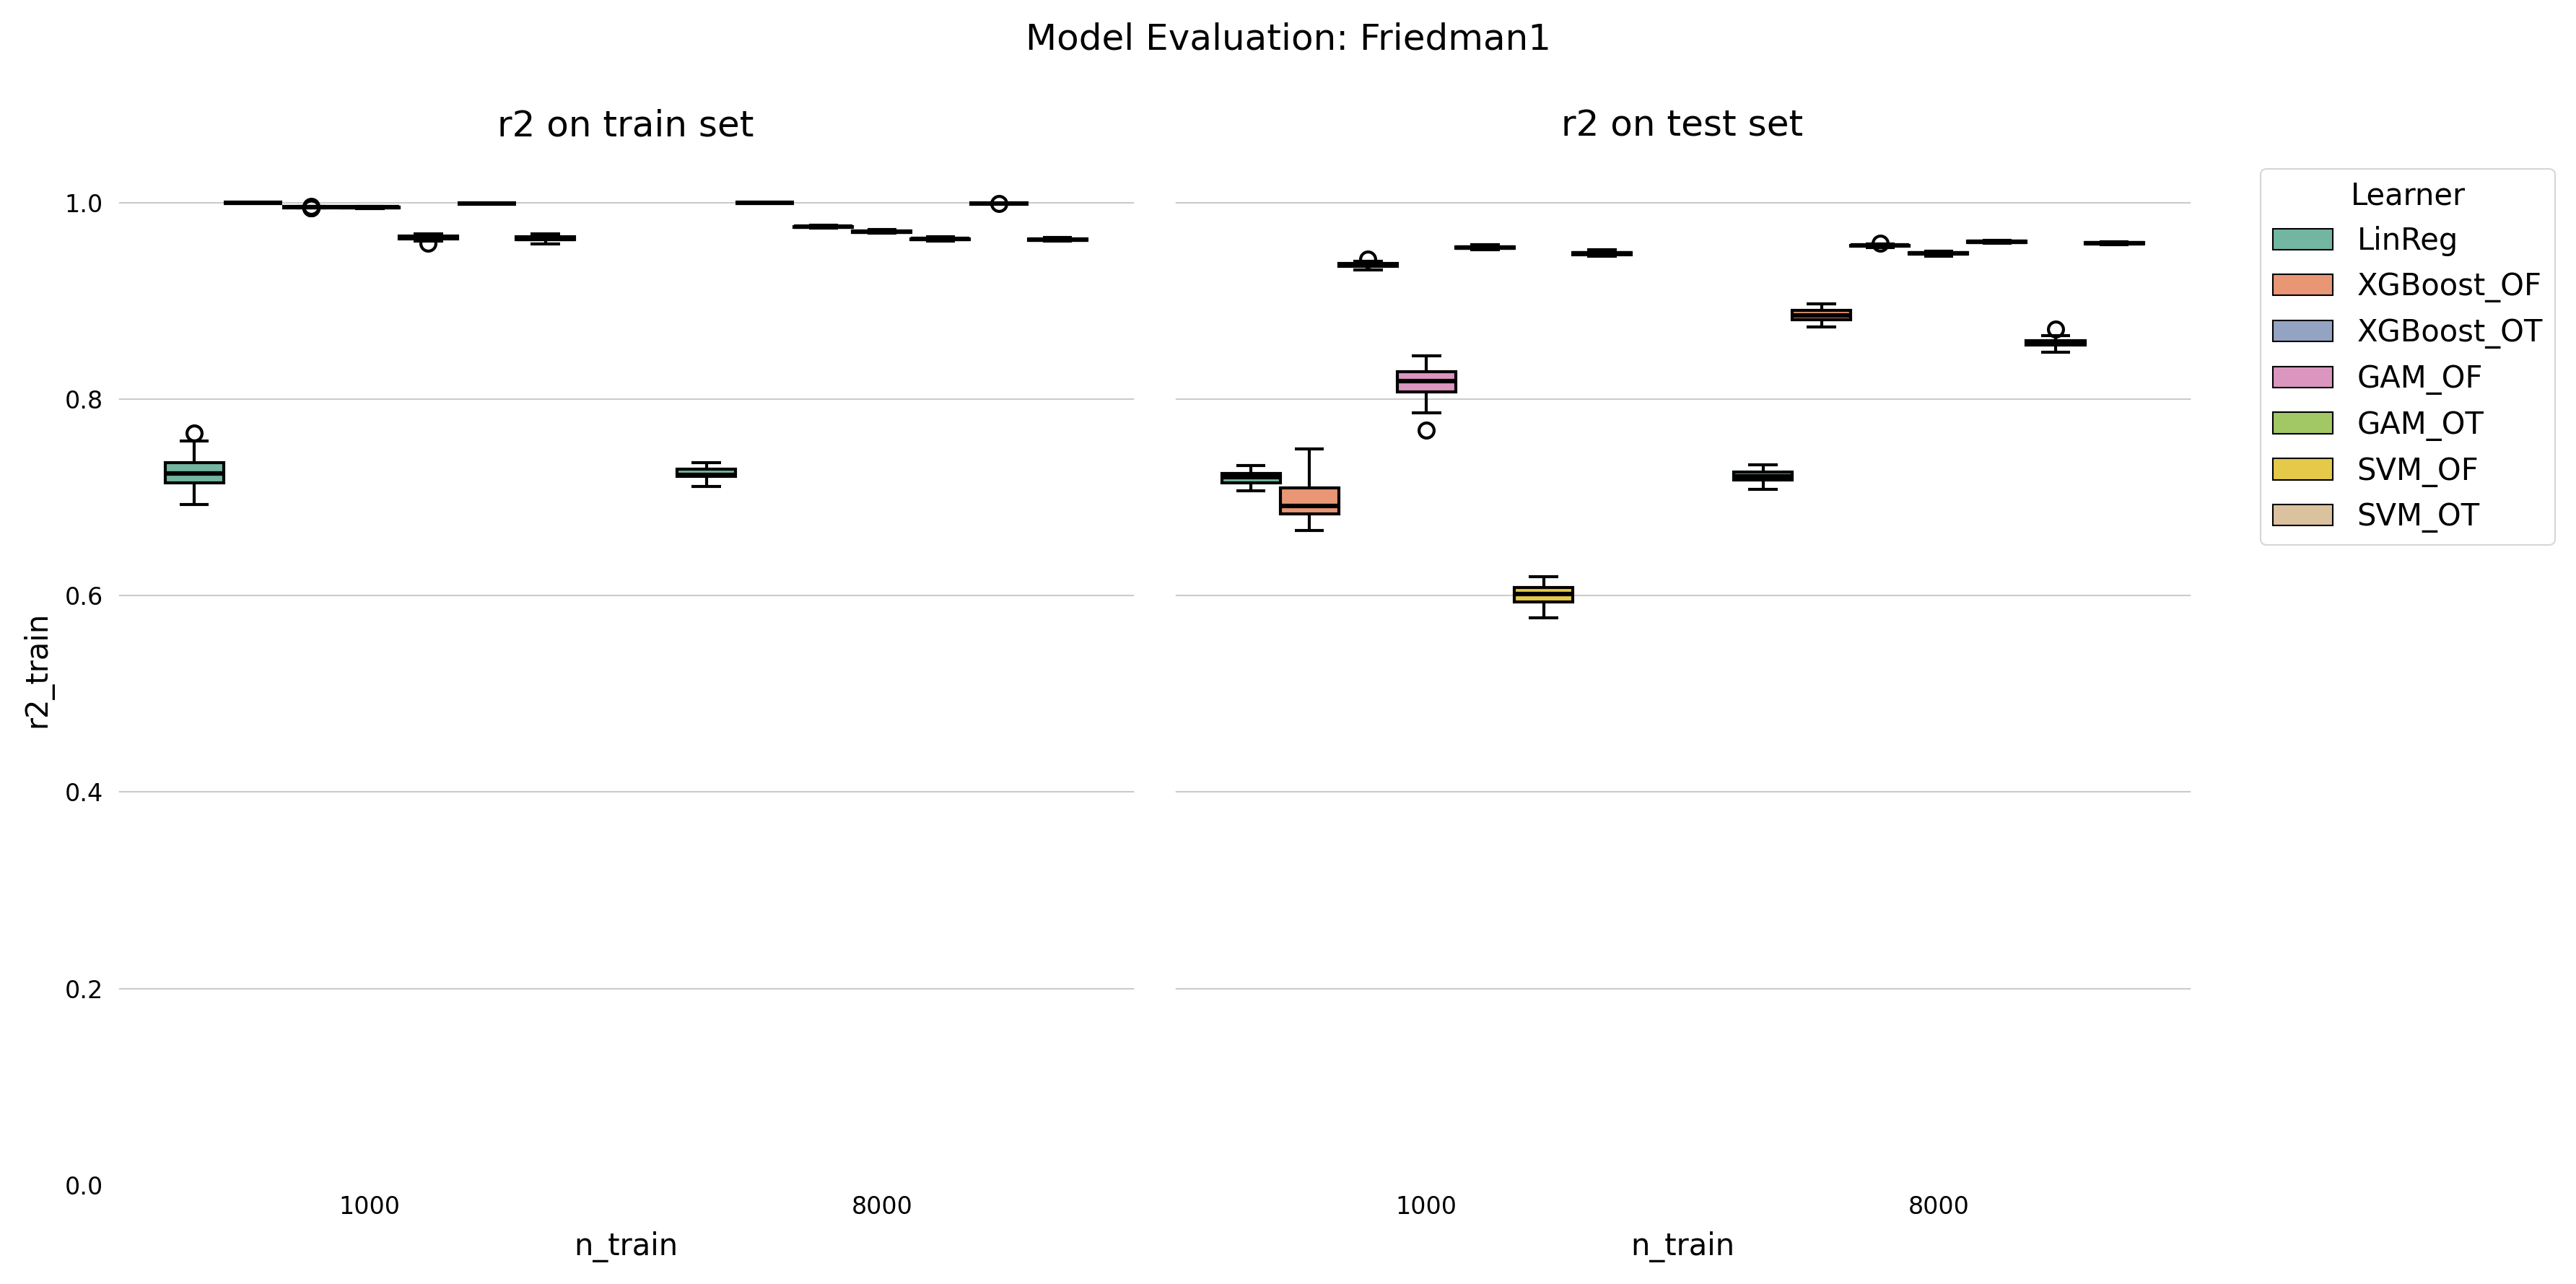

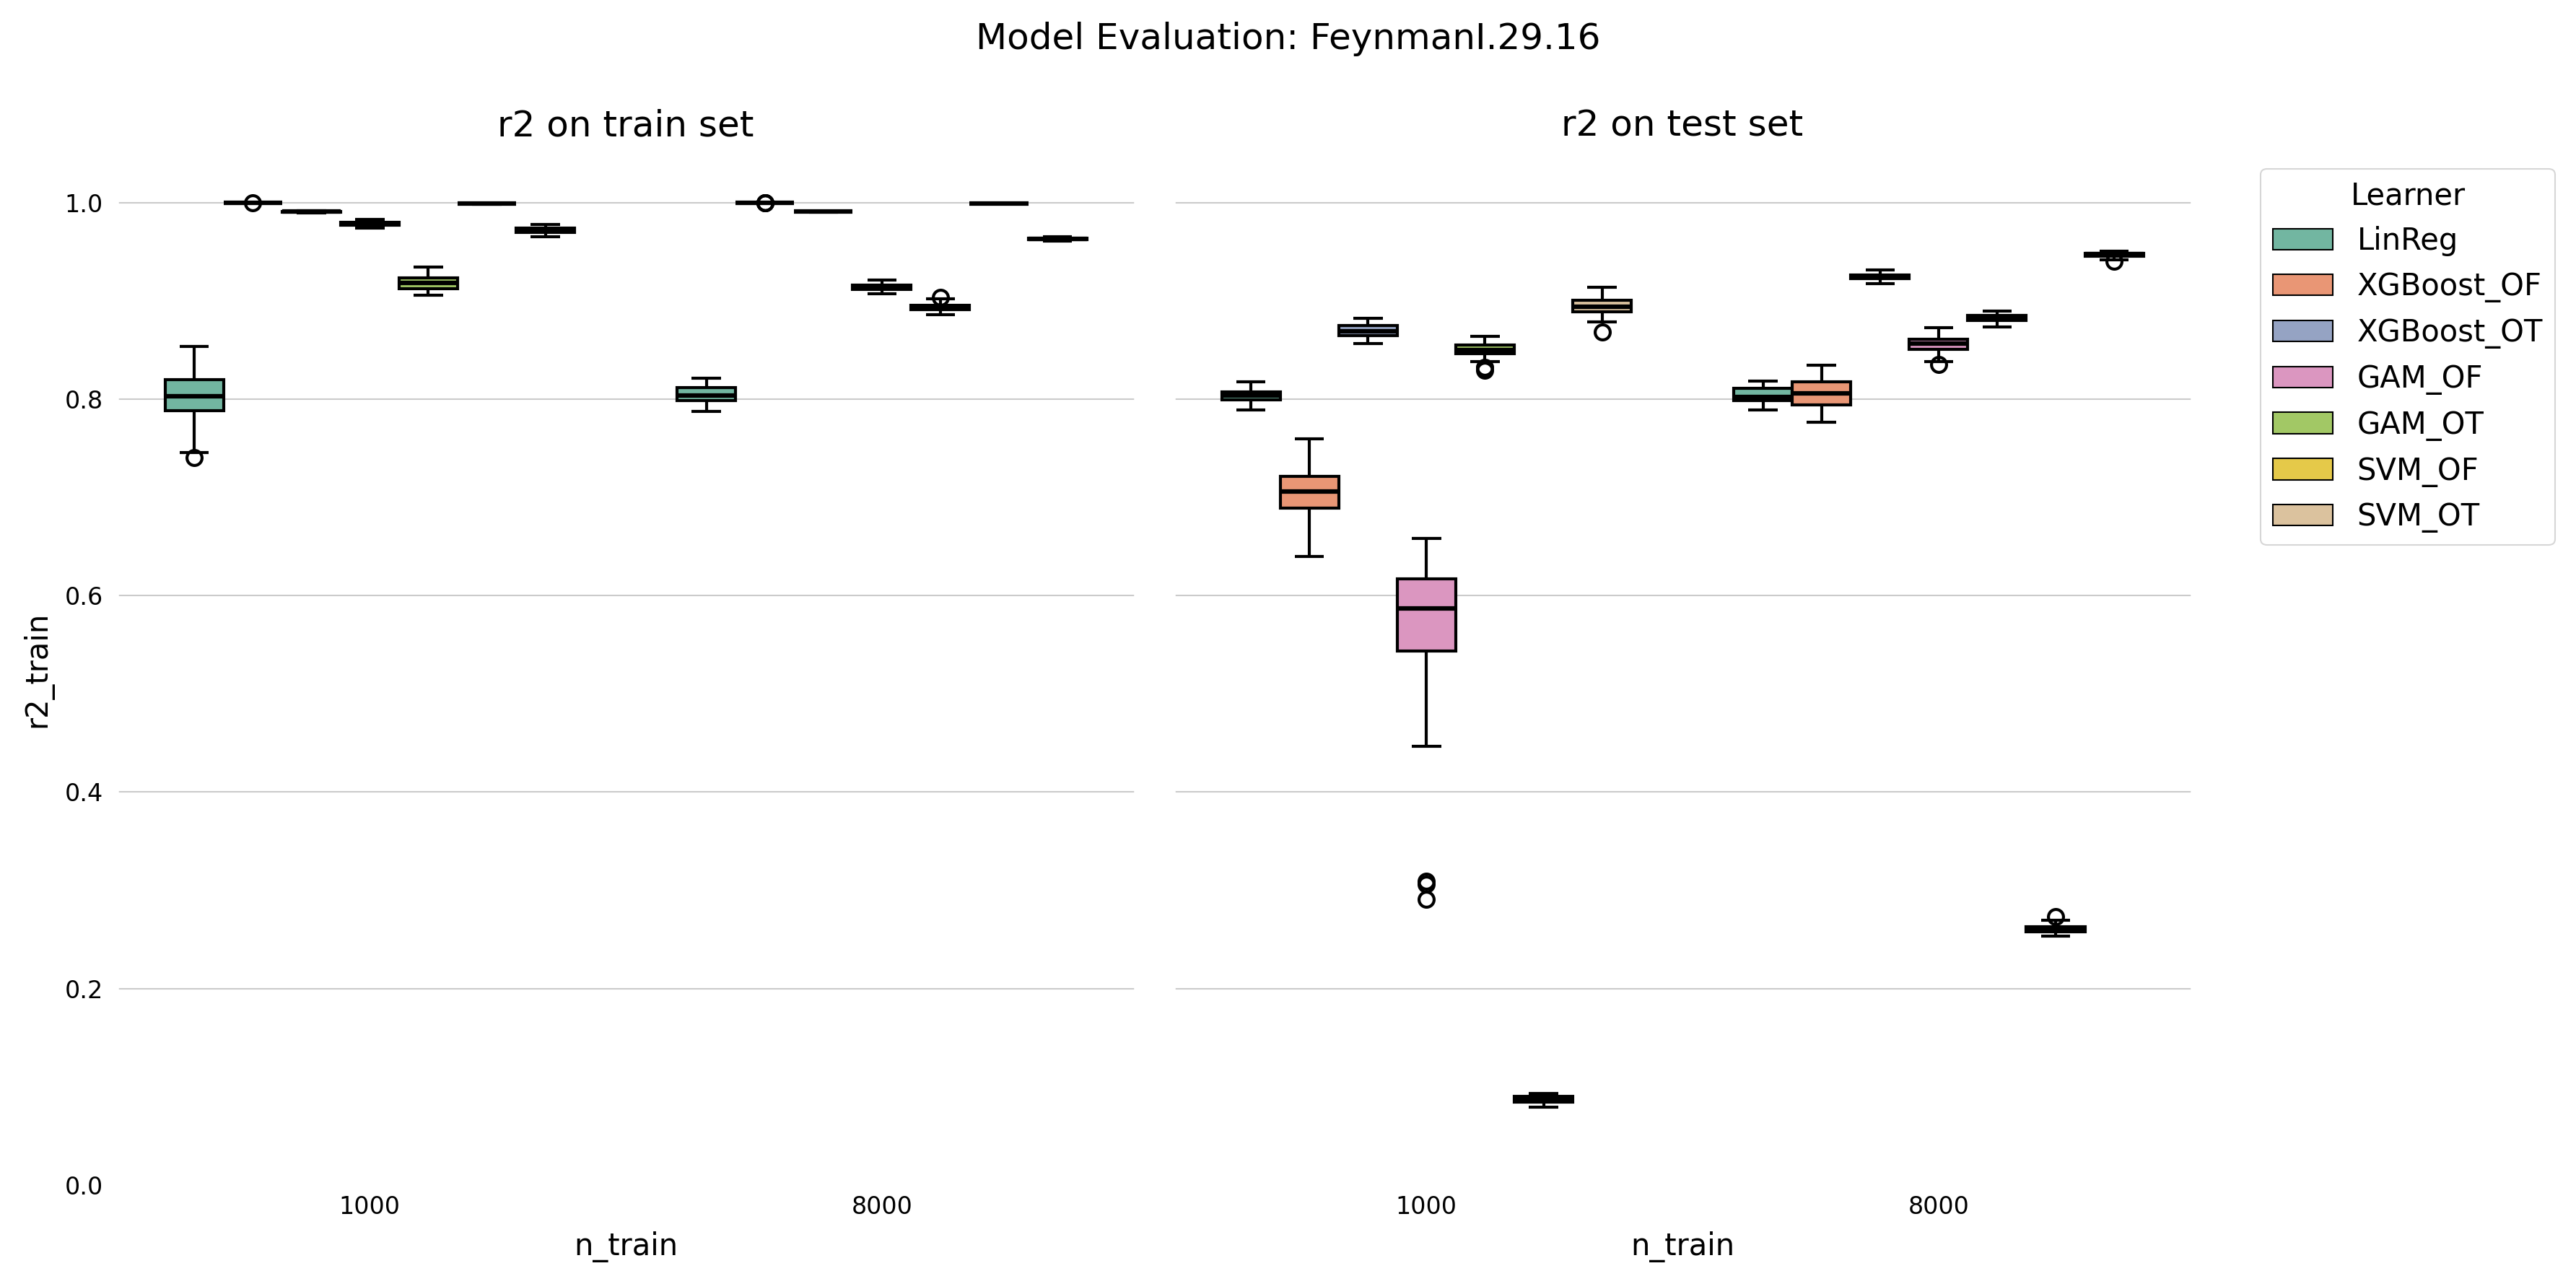

In [4]:
for df_, dataset in zip(dfs, datasets):
    boxplot_model_results(metric='r2', df=df_, ylim=(0, 1.05))
    plt.gcf().suptitle(f"Model Evaluation: {dataset}")

In [5]:
df_grouped = (
    df.groupby(["dataset", "n_train", "model"])
    .agg({"r2_train": ["mean", "std"], "r2_test": ["mean", "std"]})
    .round(4)
    .assign(
        r2_train=lambda x: x["r2_train"]["mean"].astype(str) + " ± " + x["r2_train"]["std"].astype(str),
        r2_test=lambda x: x["r2_test"]["mean"].astype(str) + " ± " + x["r2_test"]["std"].astype(str),
    )
    .droplevel(1, axis=1)
)
df_reshaped = (
    df_grouped.loc[:, ~df_grouped.columns.duplicated()]
    .reset_index()
    .pivot(columns="dataset", index=["n_train", "model"], values=["r2_train", "r2_test"])
    .reorder_levels([1, 0], axis=1)
    .reindex(
        columns=[
            ("SimpleNormalCorrelated", "r2_train"),
            ("SimpleNormalCorrelated", "r2_test"),
            ("Friedman1", "r2_train"),
            ("Friedman1", "r2_test"),
            ("FeynmanI.29.16", "r2_train"),
            ("FeynmanI.29.16", "r2_test"),
        ]
    )
)
df_reshaped

dataset            SimpleNormalCorrelated                         Friedman1  \
                                 r2_train          r2_test         r2_train   
n_train model                                                                 
1000    GAM_OF            0.9708 ± 0.0035  0.8527 ± 0.0742  0.9955 ± 0.0005   
        GAM_OT            0.9623 ± 0.0049  0.9601 ± 0.0013  0.9648 ± 0.0021   
        LinReg            0.2072 ± 0.0432   0.1813 ± 0.015  0.7257 ± 0.0158   
        SVM_OF            0.9982 ± 0.0002  0.3289 ± 0.0165     0.9996 ± 0.0   
        SVM_OT            0.9609 ± 0.0051  0.9601 ± 0.0013  0.9637 ± 0.0023   
        XGBoost_OF              1.0 ± 0.0    0.89 ± 0.0234        1.0 ± 0.0   
        XGBoost_OT        0.9773 ± 0.0052  0.9385 ± 0.0065  0.9956 ± 0.0003   
8000    GAM_OF            0.9632 ± 0.0016  0.6262 ± 0.3441  0.9708 ± 0.0008   
        GAM_OT            0.9614 ± 0.0016  0.9616 ± 0.0014    0.963 ± 0.001   
        LinReg            0.1878 ± 0.0138  0.1862 ± 0.0141  0.7241 ± 0.0055   
        SVM_OF            0.9982 ± 0.0001  0.6221 ± 0.0124     0.9996 ± 0.0   
        SVM_OT            0.9613 ± 0.0016  0.9614 ± 0.0014   0.9623 ± 0.001   
        XGBoost_OF              1.0 ± 0.0  0.9179 ± 0.0088        1.0 ± 0.0   
        XGBoost_OT        0.9611 ± 0.0018   0.951 ± 0.0028  0.9756 ± 0.0006   

dataset                               FeynmanI.29.16                   
                            r2_test         r2_train          r2_test  
n_train model                                                          
1000    GAM_OF      0.8172 ± 0.0159  0.9787 ± 0.0021  0.5624 ± 0.0863  
        GAM_OT      0.9547 ± 0.0011  0.9188 ± 0.0074  0.8501 ± 0.0075  
        LinReg      0.7197 ± 0.0062  0.8015 ± 0.0273  0.8034 ± 0.0064  
        SVM_OF      0.6008 ± 0.0107   0.999 ± 0.0001   0.0869 ± 0.004  
        SVM_OT      0.9484 ± 0.0017  0.9723 ± 0.0028  0.8945 ± 0.0092  
        XGBoost_OF   0.697 ± 0.0193        1.0 ± 0.0  0.7052 ± 0.0224  
        XGBoost_OT  0.9366 ± 0.0021  0.9909 ± 0.0006  0.8696 ± 0.0065  
8000    GAM_OF      0.9486 ± 0.0011  0.9141 ± 0.0031  0.8556 ± 0.0076  
        GAM_OT      0.9602 ± 0.0008  0.8937 ± 0.0038  0.8822 ± 0.0037  
        LinReg      0.7221 ± 0.0054  0.8047 ± 0.0087  0.8042 ± 0.0077  
        SVM_OF      0.8574 ± 0.0038      0.999 ± 0.0  0.2604 ± 0.0043  
        SVM_OT      0.9589 ± 0.0008  0.9634 ± 0.0011  0.9473 ± 0.0023  
        XGBoost_OF  0.8857 ± 0.0065        1.0 ± 0.0  0.8065 ± 0.0137  
        XGBoost_OT  0.9563 ± 0.0009  0.9911 ± 0.0002  0.9248 ± 0.0031